In [1]:
#Charles Swedensky
#CSC570 Module 2 Week 8

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Read in the dataset
df = pd.read_csv("breast_cancer.csv")

In [4]:
#Verify the data is correct
df.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
#Drop obvious unhelpful parameters
#Using index parameters or identification numbers can mislead the model's training
df = df.drop(['Unnamed: 0', 'id number'], axis=1)

In [7]:
#Set the feature we want to predict
y = df.pop("malignant")

In [8]:
#Create the train/test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=42)

In [29]:
y_test.shape

(140L,)

In [9]:
#Use Grid Search to optimize the random forest's hyperparameters
n_estimators = [300,400,500,1000]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,4,5,6,7,8,9]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)
                              

In [10]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4, 5, 6, 7, 8, 9], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [11]:
#Create models using each of the specified hyperparameter options
#Under the covers, choose the most accurate of each hyperparameters listed
#In this case:
#n_estimators = 400
#max_features = sqrt
#min_samples_split = 4
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
#Assign the best model to a variable for later use
best_rfc = estimator.best_estimator_

In [13]:
#Test the best model's accuracy and print the result
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print ("Accuracy: ", accuracy)

('Accuracy: ', 0.9642857142857143)


In [16]:
#Save off the actual 0/1 predictions to an array
y_hat = best_rfc.predict(X_test)

In [17]:
#Predictions
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [18]:
#Actual
y_test

158    0
499    0
396    0
155    1
321    0
212    0
234    0
289    1
300    1
356    1
672    0
328    1
199    0
78     0
598    0
569    1
446    0
506    1
626    1
603    1
360    1
338    0
668    1
290    0
284    1
331    0
477    0
54     1
248    0
223    1
      ..
259    0
422    0
6      0
101    1
542    0
299    1
395    0
501    0
318    0
145    0
486    0
353    1
208    0
695    0
361    1
86     1
664    0
481    0
633    1
41     1
108    0
690    0
56     1
424    0
514    1
24     0
218    1
431    0
281    0
110    0
Name: malignant, dtype: int64

In [19]:
#Manually calculate the percent accuracy of this model's predictions
#It matches -> accuracy_score(y_test, best_rfc.predict(X_test))
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print (correct / float(total))
        

0.964285714286


In [20]:
print (classification_report(y_test, best_rfc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97        95
          1       0.95      0.93      0.94        45

avg / total       0.96      0.96      0.96       140



Precision:   The model will correctly identify 97% of malignant breast tissue.   Conversely there is a 3% chance it will identify benign tissue as malginant.  (true_pos / true_pos + false_pos)

Recall:  Of the tissue the model identified as malignant, 96% of them will actually be malignant.  (true_pos / true_pos + false_neg)

In [23]:
print (confusion_matrix(y_test, best_rfc.predict(X_test)))

[[93  2]
 [ 3 42]]


**Precision:**  93 / 93 + 2 = .978

**Recall:**   93 / 93 + 3 = .968

### AUC

In [24]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", roc)

('AUC Score: ', 0.99602339181286548)


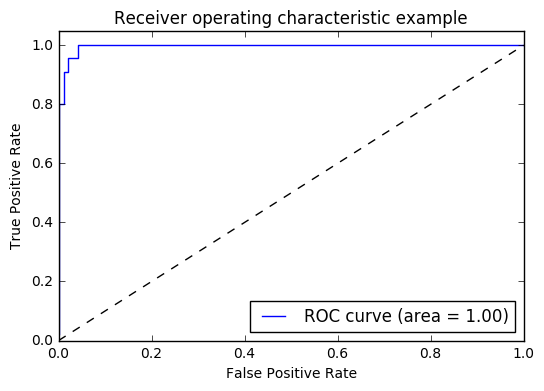

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### K-Fold Cross Validation

1.  Split the data into K chunks
2.  Train K models, retain a chunk for testing and use the other K-1 chunks for training.
3.  The result is K scores, which can be combined into a single average score for the model

In [30]:
from sklearn import cross_validation
# 1.  Implement K-Fold Cross Validation, with 10 folds, on your Breast Cancer Model
scores = cross_validation.cross_val_score(best_rfc, df, y, cv=10)

In [31]:
scores

array([ 0.92957746,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.98571429,  0.97142857,  0.98571429,  0.98550725,  1.        ])

In [33]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print ("Score is %f +/-  %f" % (mean_score, ci))
print ('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

Score is 0.970080 +/-  0.018412
95 percent probability that if this experiment were repeated over and over the average score would be between 0.951668 and 0.988492


#### 2.  Report on how the K-Fold CV score compared to your single holdout AUC
###### The mean score for this set's 10-fold cross-validation is only slightly worse than its single holdout AUC score (~2.6%).
###### AUC score: 0.99602 | 10-fold mean: 0.97008 --> (0.99602 - 0.97008) = 0.02594
###### This isn't too surprising. The single holdout AUC only looks at one potential test set to calculate accuracy and precision. It is highly dependent on the test set used to validate its results. If the test set doesn't contain an representative cross-section of instances, the results could be inflated (or deflated for that matter). Using cross-validation multiplies the number of test sets used. This broader range of testing results in a figure that takes into account the highs-and-lows of test set quality -- the best of sets and the worst of sets.
#### 3.  Write a short description of your model's performance. Include AUC, Accuracy, Precision, and Recall in your discussion
###### With that in mind, I prefer the cross-validation model over the single holdout AUC method. Using only a single test set for validation could lead to a poorly trained model being rated more highly than it deserves. Cross-validation provides a more pessimistic outlook on a model, but its perspective more closely aligns to reality.
###### This Random Forest model works very well for this data set. Its accuracy and precision values were both over 95% and it had an AUC score over 99%, which for a predictive model isn't too shabby. However, this dataset is a very important one with real-life implications. Even though the model scored very well, it isn't perfect. There is still an element of uncertainty and the diagnosis of disease and illness should not be solely left up to an algorithm. I believe that this is a very useful tool for an oncologist, but it is not a crystal ball. It is a complement to the specialist's existing array of analytical options.